# IS - Class 3
# COMPLETE
Using Pandas (cont'd)

Today we'll work with bike path data from Montreal.  The data contains how many cyclists used 9 bike paths on a given date.  We'll be following the tutorial from the following closely, which you can reference later:

http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb

Our goal is to analyze usage of the bike paths by weekday.

## 0. Warm up - Loading and Inspecting the Data

Load the bike.csv data (posted on D2L)

In [1]:
# Import pandas module
import pandas as pd

%matplotlib inline

In [2]:
# Load the data from csv, look at the head of the data
df = pd.read_csv('bike.csv')
df.head()

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,1/1/2012,0:00,16,35,51,38,5.0,26,10,0,27.0
1,2/1/2012,0:00,43,83,153,68,11.0,53,6,1,21.0
2,3/1/2012,0:00,58,135,248,104,2.0,89,3,2,15.0
3,4/1/2012,0:00,61,144,318,116,2.0,111,8,1,19.0
4,5/1/2012,0:00,95,197,330,124,6.0,97,13,2,16.0


In [3]:
type(df['Date'][0])

str

The bike paths are in French, which will make it very difficult to call on the columns.  There are several ways to deal with this, but we'll choose to rename them.

Remember that we want to analyze the bike path usage by day of the week, so that date column is important.  We can use the datatype, datetime, to help us figure out what day of the week each row is.  Currently the datatype in the Date column is a string...and you may notice that the format it's in is D/M/Y.

We're going to reload the data, adjusting for these things.

In [4]:
# Recall:  to read about this method (or other methods/functions) and its parameters
#      type ? and then the method name
?pd.read_csv

In [5]:
# Import the csv file
#     header = 0 to get rid of the header title row
#     names = [etc,...] to rename the headers
#     parse_dates = ['Date'] to make this column hold timestamps
#     dayfirst = True to indicate that the date is originally entered as D/MM/YYYY
df = pd.read_csv('bike.csv', header = 0, names = ['Date', 'Time','A','B','C','D','E','F','G','H','I'], parse_dates=['Date'], dayfirst = True)

# Look at the first few rows
df.tail()

,Date,Time,A,B,C,D,E,F,G,H,I
361,2012-12-27,0:00,8,12,7,4,NaN,1,2,0,NaN
362,2012-12-28,0:00,0,35,3,38,NaN,0,0,0,NaN
363,2012-12-29,0:00,0,27,8,42,NaN,9,0,0,NaN
364,2012-12-30,0:00,0,5,1,5,NaN,6,0,0,NaN
365,2012-12-31,0:00,0,4,3,8,NaN,12,0,0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
Date    366 non-null datetime64[ns]
Time    366 non-null object
A       366 non-null int64
B       366 non-null int64
C       366 non-null int64
D       366 non-null int64
E       146 non-null float64
F       366 non-null int64
G       366 non-null int64
H       366 non-null int64
I       317 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 31.5+ KB


In [7]:
type(df.Date[0])

pandas.tslib.Timestamp

Notice that our Date column is a datetime type now.

Also, you may have noticed that our "index column" is 0-365.  We may choose instead to have our date be the index for this dataframe.  This will make for a nicer when we plot the data.

In [8]:
df = pd.read_csv('bike.csv', index_col = 'Date', header = 0, names = ['Date', 'Time','A','B','C','D','E','F','G','H','I'], parse_dates=['Date'], dayfirst = True)
df.head()

,Time,A,B,C,D,E,F,G,H,I
Date,,,,,,,,,,
2012-01-01,0:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,0:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,0:00,58,135,248,104,2.0,89,3,2,15.0
2012-01-04,0:00,61,144,318,116,2.0,111,8,1,19.0
2012-01-05,0:00,95,197,330,124,6.0,97,13,2,16.0


In [9]:
# Looks like that Time column is useless...let's delete it.
df.drop(["Time"],1, inplace = True)
# Note:  that second parameter is axis...0 for index, 1 for column.
df

,A,B,C,D,E,F,G,H,I
Date,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,58,135,248,104,2.0,89,3,2,15.0
2012-01-04,61,144,318,116,2.0,111,8,1,19.0
2012-01-05,95,197,330,124,6.0,97,13,2,16.0


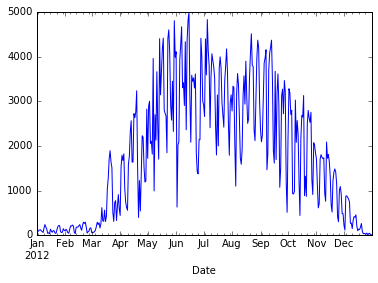

In [10]:
df.D.plot()

In [11]:
# Find the date where path D was used the most

# first find the max of the D column
max(df.D)

# the subset the dataframe based on this max number
df[ df.D == max(df.D)]

# Therefore, the date this path was used the most was 06/15/2012

,A,B,C,D,E,F,G,H,I
Date,,,,,,,,,
2012-06-15,6491,7104,7685,4999,NaN,4053,2293,2469,2756.0


## 1. Add a weekday column

Last time we introduced how to add a column.  Suppose we wanted to add a weekday column to this dataset.  Since we have a timestamp datatype for the first column, we can extract lots of information from it

In [12]:
# Use the tab key to see all the information you can use from this:
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [13]:
# To get the month
df.index.month

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

In [14]:
# To get the day
df.index.day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13

In [15]:
# To get the weekday
df.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

In [16]:
df['Day'] = df.index.weekday
df.head()

,A,B,C,D,E,F,G,H,I,Day
Date,,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0,6
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,0
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,1
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,2
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,3


## 2. Apply Method

Suppose we wanted to translate these number days into the corresponding string.  We can apply a single function to an entire column.

In [17]:
# Make a function
def weekday(num):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return days[num]

# Apply that function to every row in the dataframe
df['weekday'] = df['Day'].apply(weekday)
df.head()

,A,B,C,D,E,F,G,H,I,Day,weekday
Date,,,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0,6,Sunday
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,0,Monday
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,1,Tuesday
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,2,Wednesday
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,3,Thursday


## 3. Groupby Method

Let's create groups from the weekday column.  That is, let's group all the rows that are Sundays together, and so forth.  To do this, we can use the `groupby` method.

In [18]:
weekday_df = df.groupby('weekday')
weekday_df

So that created some `DataFrameGroupBy` object.  That object has a `groups` method that will return a dictionary whose keys are the weekday and the value is a list of the indicies that are associated with that weekday.

In [22]:
weekday_df.groups

[Timestamp('2012-01-06 00:00:00'),
 Timestamp('2012-01-13 00:00:00'),
 Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-01-27 00:00:00'),
 Timestamp('2012-02-03 00:00:00'),
 Timestamp('2012-02-10 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-02-24 00:00:00'),
 Timestamp('2012-03-02 00:00:00'),
 Timestamp('2012-03-09 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-03-23 00:00:00'),
 Timestamp('2012-03-30 00:00:00'),
 Timestamp('2012-04-06 00:00:00'),
 Timestamp('2012-04-13 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-04-27 00:00:00'),
 Timestamp('2012-05-04 00:00:00'),
 Timestamp('2012-05-11 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-05-25 00:00:00'),
 Timestamp('2012-06-01 00:00:00'),
 Timestamp('2012-06-08 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-06-22 00:00:00'),
 Timestamp('2012-06-29 00:00:00'),
 Timestamp('2012-07-06 00:00:00'),
 Timestamp('2012-07-13 00:00:00'),
 Timestamp('2012-07-

In [23]:
# How many rows are in each group
weekday_df.size()
# This make sense because if you sum this up you get 366 rows (days)...since 2012 was a leap year, this seems correct

weekday
Friday       52
Monday       53
Saturday     52
Sunday       53
Thursday     52
Tuesday      52
Wednesday    52
dtype: int64

## 4. Aggregate Method

Now that we've grouped the data by weekday, let's see how many times each bike path was used, by the day of the week.  To do this we should use the aggregate method `aggregate` method (same as `agg` method).

In [24]:
# Total bike usage for each bike path, by day of the week
weekday_counts = weekday_df.aggregate(sum)
weekday_counts

,A,B,C,D,E,F,G,H,I,Day
weekday,,,,,,,,,,
Friday,146979,150493,183961,104584,12259.0,96569,43217,59856,62164.0,208
Monday,138881,142285,174610,95565,15436.0,97001,47259,64011,74692.0,0
Saturday,118560,105635,109902,64872,11170.0,51019,53360,35507,54493.0,260
Sunday,122115,102447,102272,57438,12032.0,52419,62070,37867,84638.0,318
Thursday,150971,169976,210039,118633,15679.0,113675,46117,73215,62174.0,156
Tuesday,131632,145795,179939,99421,10629.0,100007,35901,63503,53552.0,52
Wednesday,144531,163603,200273,112344,14876.0,110820,44045,72047,63472.0,104


In [25]:
# But I really don't like that the weekday is out of order because the graph will be harder to interpret
weekday_counts = weekday_counts.reindex(['Monday', "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
weekday_counts

,A,B,C,D,E,F,G,H,I,Day
weekday,,,,,,,,,,
Monday,138881,142285,174610,95565,15436.0,97001,47259,64011,74692.0,0
Tuesday,131632,145795,179939,99421,10629.0,100007,35901,63503,53552.0,52
Wednesday,144531,163603,200273,112344,14876.0,110820,44045,72047,63472.0,104
Thursday,150971,169976,210039,118633,15679.0,113675,46117,73215,62174.0,156
Friday,146979,150493,183961,104584,12259.0,96569,43217,59856,62164.0,208
Saturday,118560,105635,109902,64872,11170.0,51019,53360,35507,54493.0,260
Sunday,122115,102447,102272,57438,12032.0,52419,62070,37867,84638.0,318


In [26]:
# And we don't want that day column
weekday_counts.drop("Day",1, inplace = True)
weekday_counts

,A,B,C,D,E,F,G,H,I
weekday,,,,,,,,,
Monday,138881,142285,174610,95565,15436.0,97001,47259,64011,74692.0
Tuesday,131632,145795,179939,99421,10629.0,100007,35901,63503,53552.0
Wednesday,144531,163603,200273,112344,14876.0,110820,44045,72047,63472.0
Thursday,150971,169976,210039,118633,15679.0,113675,46117,73215,62174.0
Friday,146979,150493,183961,104584,12259.0,96569,43217,59856,62164.0
Saturday,118560,105635,109902,64872,11170.0,51019,53360,35507,54493.0
Sunday,122115,102447,102272,57438,12032.0,52419,62070,37867,84638.0


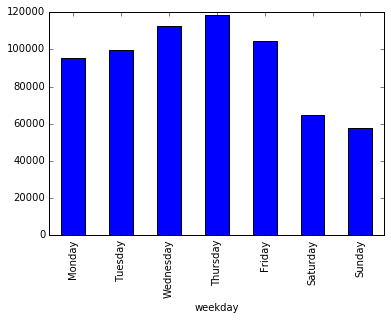

In [27]:
# Plot the total bike usage on bike path D, by day of the week
weekday_counts.D.plot(kind = "bar")

The numpy library offers a lot more summary statistics that may be of interest.  Typically when importing numpy we'll import as np for short.  Some functions offered in the numpy library can be found here:  

https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html

In [28]:
import numpy as np
weekday_means = weekday_df.aggregate(np.mean)
weekday_means = weekday_means.reindex(['Monday', "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
weekday_means.drop("Day",1, inplace = True)
weekday_means

,A,B,C,D,E,F,G,H,I
weekday,,,,,,,,,
Monday,2620.396226,2684.622642,3294.528302,1803.113208,735.047619,1830.207547,891.679245,1207.754717,1623.739130
Tuesday,2531.384615,2803.750000,3460.365385,1911.942308,506.142857,1923.211538,690.403846,1221.211538,1190.044444
Wednesday,2779.442308,3146.211538,3851.403846,2160.461538,708.380952,2131.153846,847.019231,1385.519231,1410.488889
Thursday,2903.288462,3268.769231,4039.211538,2281.403846,746.619048,2186.057692,886.865385,1407.980769,1381.644444
Friday,2826.519231,2894.096154,3537.711538,2011.230769,583.761905,1857.096154,831.096154,1151.076923,1381.422222
Saturday,2280.000000,2031.442308,2113.500000,1247.538462,558.500000,981.134615,1026.153846,682.826923,1210.955556
Sunday,2304.056604,1932.962264,1929.660377,1083.735849,572.952381,989.037736,1171.132075,714.471698,1839.956522


## 5.  Summing across rows or columns

Suppose we want to know 1) which bike path got used the most in 2012 and 2) which day of the week the bike paths are used most.  What do we want to do to answer each of these questions?

1)  To answer which bike path got used the most in 2012, we need to sum the columns<br>
2)  To answer which day of the week the bike paths are used the most, we need to sum the rows

To do this, we can use the sum method.  You can read more about it here:  <br>https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html

In [29]:
#Let's look at the data again
weekday_counts

,A,B,C,D,E,F,G,H,I
weekday,,,,,,,,,
Monday,138881,142285,174610,95565,15436.0,97001,47259,64011,74692.0
Tuesday,131632,145795,179939,99421,10629.0,100007,35901,63503,53552.0
Wednesday,144531,163603,200273,112344,14876.0,110820,44045,72047,63472.0
Thursday,150971,169976,210039,118633,15679.0,113675,46117,73215,62174.0
Friday,146979,150493,183961,104584,12259.0,96569,43217,59856,62164.0
Saturday,118560,105635,109902,64872,11170.0,51019,53360,35507,54493.0
Sunday,122115,102447,102272,57438,12032.0,52419,62070,37867,84638.0


In [30]:
# Let's take a look at the .sum method
?weekday_counts.sum
#...so axis will allow us to specify if we want to sum across rows or columns.

To clear up axis = 0 versus axis = 1, you can read this: <br>
https://stackoverflow.com/questions/25773245/ambiguity-in-pandas-dataframe-numpy-array-axis-definition <br>

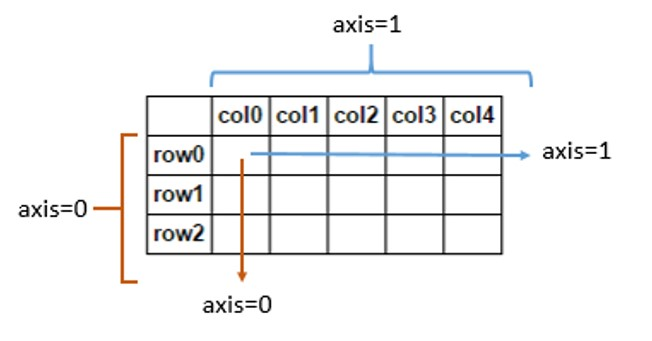

In [32]:
from IPython.display import Image
Image(filename='axis.jpg')

In [33]:
# To sum down the columns, use the axis = 0
weekday_counts.sum(0)

A     953669.0
B     980234.0
C    1160996.0
D     652857.0
E      92081.0
F     621510.0
G     331969.0
H     406006.0
I     455185.0
dtype: float64

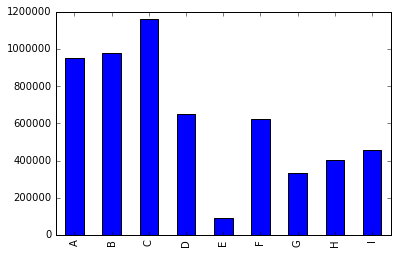

In [35]:
weekday_counts.sum(0).plot(kind = "bar")

In [36]:
# To sum across the rows, use the axis = 1
weekday_counts.sum(1)

weekday
Monday       849740.0
Tuesday      820379.0
Wednesday    926011.0
Thursday     960479.0
Friday       860082.0
Saturday     604518.0
Sunday       633298.0
dtype: float64

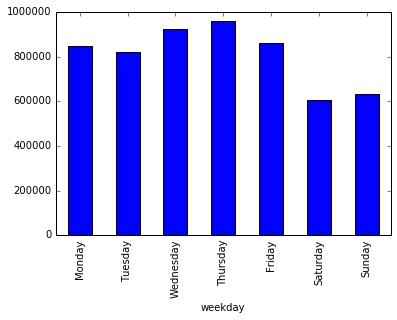

In [37]:
weekday_counts.sum(1).plot(kind = "bar")

## You try

What month does path D get used most?

In [38]:
df["Month"] = df.index.month
df.head()

,A,B,C,D,E,F,G,H,I,Day,weekday,Month
Date,,,,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0,6,Sunday,1
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,0,Monday,1
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,1,Tuesday,1
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,2,Wednesday,1
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,3,Thursday,1


In [39]:
# Make a function
def month(num):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return months[num-1]

df['Month_Name'] = df.Month.apply(month)
df.head()

,A,B,C,D,E,F,G,H,I,Day,weekday,Month,Month_Name
Date,,,,,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0,6,Sunday,1,Jan
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,0,Monday,1,Jan
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,1,Tuesday,1,Jan
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,2,Wednesday,1,Jan
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,3,Thursday,1,Jan


In [40]:
month_counts = df.groupby('Month_Name').aggregate(sum)
month_counts = month_counts.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
month_counts.drop(["Day", "Month"],1, inplace = True)
month_counts

,A,B,C,D,E,F,G,H,I
Month_Name,,,,,,,,,
Jan,1140,4915,7737,3308,255.0,3088,160,38,719.0
Feb,73,6712,10226,4573,273.0,4852,240,51,594.0
Mar,26437,26229,35736,18194,2082.0,21487,6634,11388,47199.0
Apr,71759,67699,85786,49312,36455.0,46048,16195,29137,29452.0
May,129590,133277,154562,94224,53016.0,78355,50130,54360,65180.0
Jun,146530,144858,169241,95213,NaN,86190,53043,58826,74901.0
Jul,150703,162530,182644,101969,NaN,88010,80033,59657,81238.0
Aug,137377,149241,168572,95110,NaN,84261,57583,61589,82530.0
Sep,123757,127024,147243,83540,NaN,86611,42328,57986,59549.0


In [41]:
month_counts[month_counts.D == max(month_counts.D)]

,A,B,C,D,E,F,G,H,I
Month_Name,,,,,,,,,
Jul,150703,162530,182644,101969,NaN,88010,80033,59657,81238.0


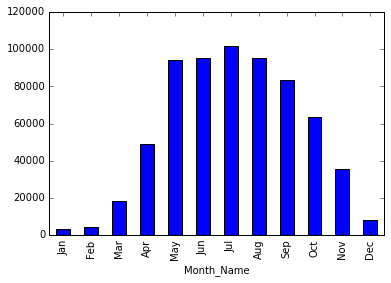

In [42]:
month_counts.D.plot(kind = "bar")

Answer:  July